In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [3]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/twitter_validation.csv",header=None,encoding='ISO-8859-1')

In [4]:
df.columns = ['id','media','target','text']

In [5]:
df.head()


,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
df.tail()

,id,media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [7]:
df.shape

(1000, 4)

In [8]:
df.dtypes


id         int64
media     object
target    object
text      object
dtype: object

In [9]:
df.isna().sum()

id        0
media     0
target    0
text      0
dtype: int64

In [10]:
target = df['target'].value_counts()

([<matplotlib.patches.Wedge at 0x74383963ec60>,
 [Text(0.6877669159306886, 0.8584734529099833, 'Neutral'),
  Text(-0.9753570746711192, 0.5086045388010189, 'Positive'),
  Text(-0.37261135208478974, -1.0349689755241676, 'Negative'),
  Text(0.9432797819188458, -0.5658827202019293, 'Irrelevant')])

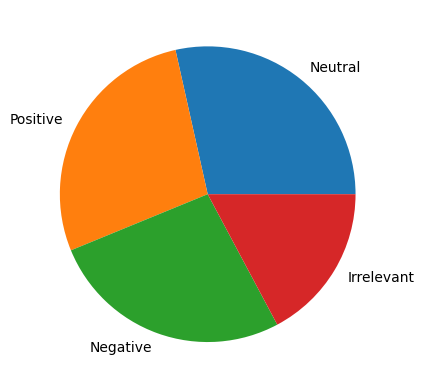

In [11]:
plt.pie(x=target.values,labels=target.index)

<Axes: xlabel='target', ylabel='count'>

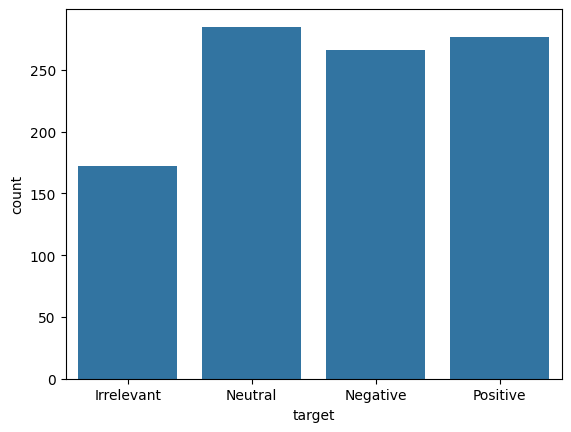

In [12]:
sns.countplot(x=df['target'],data=df)

In [13]:
df['media'].unique()

array(['Facebook', 'Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA',
       'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed',
       'CallOfDuty', 'Dota2', 'Verizon', 'NBA2K', 'Nvidia',
       'GrandTheftAuto(GTA)', 'RedDeadRedemption(RDR)', 'Hearthstone',
       'ApexLegends', 'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)',
       'Borderlands', 'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'HomeDepot',
       'Cyberpunk2077', 'TomClancysGhostRecon', 'WorldOfCraft',
       'LeagueOfLegends', 'Battlefield'], dtype=object)

In [14]:
df = df.drop(columns=['id','media'])

In [15]:

df.drop(df.index[df['target']=='Irrelevant'],axis=0,inplace=True)

df.reset_index(drop=True,inplace=True)

In [16]:
df['target'] = df['target'].map({'Positive':1,'Neutral':0,'Negative':-1})

In [17]:
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [18]:
df['target'].value_counts()

target
 0    285
 1    277
-1    266
Name: count, dtype: int64

In [19]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/devjith/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/devjith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/devjith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/devjith/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
tweets = df['text']
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [21]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()
tweets = tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets



0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [22]:
#tweets = tweets.apply(lambda x:re.sub('[^a-zA-Z0-9]',' ',x))
tweets = tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [23]:
from nltk.tokenize import word_tokenize

tweets = tweets.apply(lambda x: ' '.join([i for i in word_tokenize(x) if len(i)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [24]:
from nltk.stem import SnowballStemmer

stem = SnowballStemmer(language='english')

tweets = tweets.apply(lambda x:[stem.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets = tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

train_data = vec.fit_transform(tweets)

In [27]:
print(train_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10351 stored elements and shape (828, 3695)>
  Coords	Values
  (0, 417)	0.49031253984627876
  (0, 2186)	0.394104073145298
  (0, 254)	0.15115412177221707
  (0, 513)	0.22624362709845244
  (0, 1725)	0.24515626992313938
  (0, 447)	0.2601680790626036
  (0, 2668)	0.2601680790626036
  (0, 688)	0.2137861877383711
  (0, 742)	0.17311152137137992
  (0, 186)	0.22624362709845244
  (0, 1888)	0.13243685500438873
  (0, 1016)	0.23450522183507658
  (0, 888)	0.2601680790626036
  (0, 571)	0.2601680790626036
  (1, 2048)	0.24555654927912696
  (1, 3550)	0.26216072802580975
  (1, 2363)	0.3126902562590763
  (1, 3590)	0.36557591217188057
  (1, 1293)	0.4055823664694651
  (1, 2461)	0.3821800909185634
  (1, 2801)	0.4055823664694651
  (1, 678)	0.4055823664694651
  (2, 839)	0.3041178383627944
  (2, 1998)	0.3963165794888645
  (2, 1290)	0.3790982275064499
  :	:
  (825, 510)	0.2298106111210094
  (825, 3294)	0.2560582225152133
  (825, 3304)	0.3395996844494918

In [28]:
y = df['target'].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data,y,test_size=0.3,random_state=1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
multi = MultinomialNB()
svm = SVC()
tree = DecisionTreeClassifier(criterion='entropy')
random = RandomForestClassifier(n_estimators=2000,criterion='entropy',n_jobs=-1,random_state=42)

In [32]:
knn.fit(x_train,y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:
multi.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [34]:
svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [35]:
tree.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
random.fit(x_train,y_train)

,n_estimators,2000
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
ypred_knn = knn.predict(x_test)
y_pred_multi = multi.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_tree = tree.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
lst = [knn,multi,svm,tree,random]
for i in lst:
    yp = i.predict(x_test)
    print(f"{i} has accuracy of {accuracy_score(y_test,yp)}")

KNeighborsClassifier(n_neighbors=7) has accuracy of 0.4939759036144578
MultinomialNB() has accuracy of 0.5983935742971888
SVC() has accuracy of 0.6104417670682731
DecisionTreeClassifier(criterion='entropy') has accuracy of 0.4738955823293173
RandomForestClassifier(criterion='entropy', n_estimators=2000, n_jobs=-1,
                       random_state=42) has accuracy of 0.5863453815261044


In [39]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(n_estimators=2000,criterion='entropy',n_jobs=-1,random_state=42)

model_random.fit(x_train,y_train)

,n_estimators,2000
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred_random = model_random.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,ypred_knn))
print(classification_report(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_multi))
print(classification_report(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_random))



              precision    recall  f1-score   support

          -1       0.41      0.80      0.54        74
           0       0.65      0.37      0.48        91
           1       0.57      0.36      0.44        84

    accuracy                           0.49       249
   macro avg       0.54      0.51      0.48       249
weighted avg       0.55      0.49      0.48       249

              precision    recall  f1-score   support

          -1       0.59      0.72      0.65        74
           0       0.62      0.64      0.63        91
           1       0.63      0.49      0.55        84

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.61       249

              precision    recall  f1-score   support

          -1       0.57      0.70      0.63        74
           0       0.67      0.53      0.59        91
           1       0.57      0.58      0.58        84

    accuracy        

In [42]:
print(accuracy_score(y_test,y_pred_random))

0.5863453815261044


In [57]:
s = "this software is exteremely useful"

In [58]:
s = ' '.join(word_tokenize(s))
s = ' '.join([i for i in word_tokenize(s) if len(i)>=3])
s = ' '.join([stem.stem(i.lower()) for i in word_tokenize(s)])
s = ' '.join([i for i in word_tokenize(s) if i not in stop])

In [59]:
svm.predict(vec.transform([s]))

array([0])